In *supervised learning*, the training set you feed to the algorithm includes the desired solutions, called *labels*.

An *attribute* is a data type, while a *feature* generally means an attribute plus its value. But often times they are used interchangeably.

Typical supervised learning task, called *regression* is to predict a *target*  numeric value, such as the price of a car, given a set of *features* (mileage, age, brand, etc) called *predictors*. 

In *unsupervised  learning*, the training data is unlabeled.

*Dimensionality reduction* is a task to simplify the data without losing too much information. One way to achieve this is selecting a subset of the original features (*feature selection*) while discarding the rest. Another way is to build a new set of simpler features from the original features (*feature extraction*).

*Association rule learning* is an unsupervised learning task to dig into large amounts of data and discover interesting relations between attributes.

In *reinforcement learning*, the learning system, called an *agent*, can observe the environment, select and perform actions, and get *rewards* in return (or *penalties* in the form of negative rewards). It must then learn by itself what is the best strategy, called a *policy*, to get the most reward over time.

In *batch learning*, the system must be trained using all the available data.

In *online learning*, you train the system incrementally by feeding it dta instances sequentially, either individually or in small groups called *mini-batches*.

Online learning algorithms can also be used to train systems on huge datasets that cannot fit in one machine's main memory (this is called *out-of-core learning*).

One important parameter of online learning systems is how fast they should adopt to changing data: this is called the *learning rate*.

A *utility function* (or *fitness function*) measures how good your model is, and a *cost function* measures how bad it is.

*Training* a model means finding *model parameters* from training data for a better performance measure.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [6]:
# Load the data
oecd_bli = pd.read_csv("handson-ml2/datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(
    "handson-ml2/datasets/lifesat/gdp_per_capita.csv",
    thousands=',',
    delimiter='\t',
    encoding='latin1',
    na_values='n/a')

In [8]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [22]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

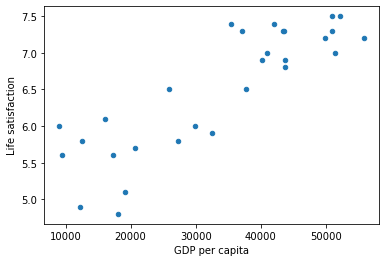

In [59]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [24]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [25]:
# train the mode
model.fit(X, y)

LinearRegression()

In [68]:
# Make a prediciton for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.96242338]]


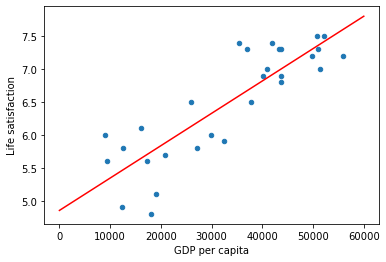

In [67]:
# Visualize the data with the fitted line
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
GDP = np.linspace(0, 60000, num=301)
LS = np.array(model.coef_*GDP + model.intercept_)[0]
plt.plot(GDP, LS, 'r')
plt.show()

If the sample size is too small, you will have *sampling noise*. If the sampling method is flawed, you will have *sampling bias*.

*Feature engineering* is a process to prepare good set of features by feature selection, feature extraction, and creating new features by gathering new data.

*overfitting* means that the model is trained to perform well on the training data, but it does not generalize well for new data.

Constraining a model to make it simpler and reduce the risk of overfitting is called *regularization*.

A *hyperparamter* is a parammeter of a learning algorithm (not of the model).

*Underfitting* is the opposite of overfitting.

You train your model using the *training set*, and you test it using the *test set*. The error rate on new cases is called the *generalization error* (or *out-of-sample error*), and by evaluating your model on the test set, you get an estimate of this error

The training set is used to fit the models; the *validation set* is used to estimate prediction error for model selection; the test set is used for assessment of the generalization error of the final chosen model. Ideally, the test set should be kept in a “vault,” and be brought out only at the end of the data analysis